In [ ]:
# Brownian v2 and v3 in this file. v2 is just for archival purpose. Use v3 for multiprocessing.

In [18]:
import random, matplotlib.pyplot as plt, time, math, multiprocessing, concurrent.futures
import numpy as np

#plt.style.use(['science'])

def flatten(xss):
    return [x for xs in xss for x in xs]

gamma,Radius_of_circle=1,1
sigma,drift,potential_constant,time2=0.8,0.1,0,200

ram0=1024
def brownian_v3(iterations):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time2]
    #intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    intial_pos=0.0
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time2/dt) #Total time
    std=np.sqrt(dt*sigma)
    
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(-np.sin(theta))/Radius_of_circle)*dt)
            
        theta2=theta-np.floor((theta-np.pi)/(2*np.pi))*2*np.pi-2*np.pi
        
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time2
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()


    return pos,cur #D

if __name__ == "__main__":
    iterations=10**3
    
    with concurrent.futures.ProcessPoolExecutor() as executor:
        start_time = time.perf_counter()
        temp = list(executor.map(brownian_v3, [10 for i in range(int(iterations/10))]))
        finish_time = time.perf_counter()
    print(f"Program finished in {finish_time-start_time} seconds")
    

results = [[temp[j][i] for j in range(len(temp))] for i in range(len(temp[0]))]
pos = flatten(results[0])
cur = flatten(results[1])

print(len(cur))


Program finished in 11.190797177999912 seconds
1024000


In [72]:
np.sqrt(0.1*sigma)

0.024494897427831782

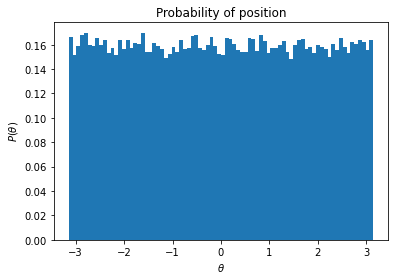

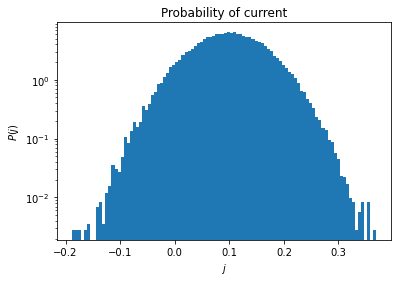

In [13]:
fig1 = plt.figure(1)
plt.hist(pos, bins=80, density=True)
plt.title('Probability of position')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

bins_manual=[]
for i in range(-7,13):
    bins_manual.append((2*np.pi*i-np.pi)/time2)   #data[2][4] is time

fig2 = plt.figure(2)
plt.hist(cur, bins=100, density=True)
#plt.hist(cur, bins=bins_manual,density=True)
plt.title('Probability of current')
plt.xlabel('$j$')
plt.ylabel('$P(j)$')
plt.yscale('log')

plt.show()

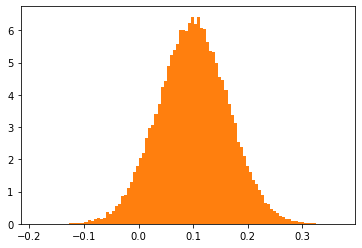

In [14]:
pj=plt.hist(cur, bins=100, density=True)[0]
pjx=plt.hist(cur, bins=100, density=True)[1]
pjj=[]
pjjx=[]
for i in range(len(pj)-1):
    if pj[i]!=0:
        pjj.append(pj[i])
        pjjx.append((pjx[i+1]+pjx[i])/2)
#pj2=(-1/time2)*np.log(pjj)

Area2=0
for i in range(len(pjjx)):
    Area2+=pjj[i]

Area=np.sum(pj)*(pjx[2]-pjx[1])

pj2=(-1/time2)*np.log(pjj)

In [112]:
Area2

1624.6619679514622

<function matplotlib.pyplot.show(close=None, block=None)>

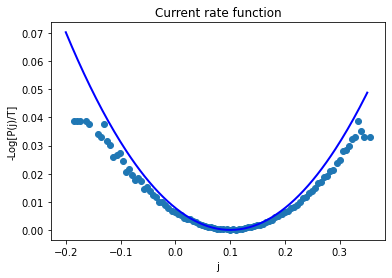

In [16]:
X1 = np.linspace(-0.2, 0.35, 200)

Y1=((X1-drift)**2)/(2*sigma**2)

plt.plot(X1,Y1, color='blue',linewidth=2)

plt.scatter(pjjx,pj2-min(pj2))
plt.title('Current rate function')
plt.xlabel('j')
plt.ylabel('-Log[P(j)/T]')

plt.show

In [8]:
min(pj2-min(pj2))

0.0

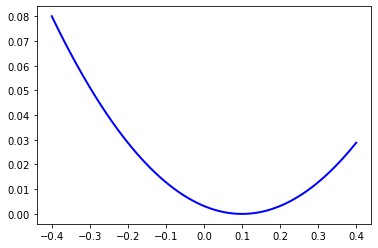

In [8]:
X1 = np.linspace(-0.4, 0.4, 200)

Y1=((X1-drift)**2)/2*sigma**2

plt.plot(X1,Y1, color='blue',linewidth=2)

In [55]:
import numpy as np
import random, matplotlib.pyplot as plt, time, math

gamma,Radius_of_circle=1,1

ram0=1024

def brownian_v2(sigma,drift,potential_constant,iterations,time):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time]
    intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time/dt) #Total time
    std=np.sqrt(dt*sigma)
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(np.sin(theta))/Radius_of_circle)*dt)
            
        for k in range(len(theta)):
            if -np.pi<theta[k]<=np.pi:
                theta2[k]=theta[k]
            else:
                theta2[k]=-np.sign(theta[k])*np.pi+theta[k]-np.pi-int((theta[k]-np.pi)/(2*np.pi))*2*np.pi   
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()
    
    return pos,cur,C,#D

In [104]:
t1=time.perf_counter()
data=brownian_v2(0.3,0.1,1,256,3)
print(time.perf_counter()-t1)

0.5873084320046473


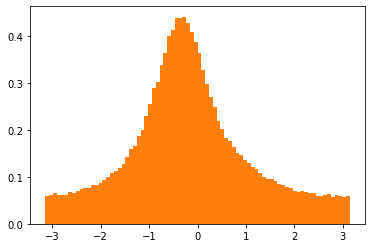

In [105]:
qj=plt.hist(data[0], bins=80, density=True)[0]
qjx=plt.hist(data[0], bins=80, density=True)[1]
qjj=[]
qjjx=[]
for i in range(len(qj)-1):
    if qj[i]!=0:
        qjj.append(qj[i])
        qjjx.append((qjx[i+1]+qjx[i])/2
qj2=(-1e-1)*np.log(qjj)

<function matplotlib.pyplot.show(close=None, block=None)>

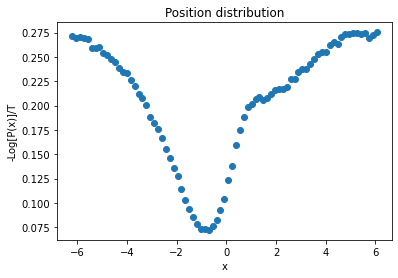

In [101]:
jupyter nbextension enable codefolding/mainplt.scatter(qjjx,qj2)
plt.title('Position distribution')
plt.xlabel('x')
plt.ylabel('-Log[P(x)]/T')

plt.show

In [25]:
min(cur)

-0.23849806549897842

In [9]:
print(len(bins_manual))

20


In [58]:
-np.arcsin(-Radius_of_circle*0.1/1)+np.pi

3.241760074751353

In [2]:
pj=plt.hist(cur, bins=bins_manual, density=True)[0]

NameError: name 'plt' is not defined

In [84]:
pj

array([ 0.15867389,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.15867389,
        0.        ,  0.        ,  0.        ,  0.15867389,  0.        ,
        0.15867389,  0.        ,  0.15867389,  0.31734778,  0.31734778,
        0.47602167,  0.95204334,  0.79336945,  1.42806502,  3.01480393,
        3.64949949,  1.90408669,  3.96684727,  4.76021672,  4.60154283,
        6.50562952,  8.88573789, 10.47247679, 11.26584625, 18.40617133,
       18.72351911, 19.35821468, 23.80108362, 26.97456144, 32.21079983,
       36.81234267, 40.14449437, 42.84195052, 44.9047111 , 48.87155837,
       56.32923124, 57.28127458, 61.40679574, 63.46955632, 60.29607851,
       65.5323169 , 64.42159967, 61.72414352, 64.26292578, 59.34403516,
       54.26647066, 54.26647066, 58.23331793, 49.50625393, 48.87155837,
       40.62051605, 37.12969045, 40.14449437, 31.1000826 , 26.18119198,
       23.32506195, 22.84904028, 17.45412799, 14.59799795, 15.23

In [85]:
np.sum(pj)

1624.8206418422662

In [86]:
Area

3249.4826097937284

In [ ]:
Area